In [ ]:
import numpy as np # работа с числовыми массивами, матрицами, случайными числами
import pandas as pd # пакет для работы с наборами данных
import matplotlib.pyplot as plt # пакет для построения графиков
import seaborn as sns # надстройка над matplot для более удобного построения графиков

In [ ]:
import requests # работа с веб-запросами
from urllib.parse import urlencode # работа с url-адресами
import json # работа с форматом json

In [ ]:
pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Загрузка данных

In [ ]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' # общая часть ссылки для загрузки с яндекс-диска
public_key = 'https://disk.yandex.ru/d/2Id5EZ7UuMKdzg'  # Ссылка на файл на яндекс диске

In [ ]:
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key)) # объединяем общую часть и часть указывающую на необходимый файл
response = requests.get(final_url) # cоздаем веб-запрос
download_url = json.loads(response.text)['href'] # достаем из веб-запроса ссылку для скачивания

In [ ]:
DF = pd.read_csv(download_url)

In [ ]:
DF.head() #выводим первые 5 строк

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
DF = DF.drop(columns=["Unnamed: 0"])  # в исходном файле присутствует индексный столбец, нам он не нужен

In [ ]:
DF.head() #выводим первые 5 строк

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
DF.shape # показывает сколько у нас (строк, столбцов)

(19020, 11)

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


Строка - объект

Столбец - признак (кроме class)

1. fLength: главная ось эллипса (мм)
2. fWidth: малая ось эллипса (мм)
3. fSize: 10-логарифмическая сумма содержания всех пикселей
4. fConc: отношение суммы двух наибольших пикселей к fSize
5. fConc1: отношение наибольшего пикселя к fSize
6. fAsym: расстояние от самого высокого пикселя до центра,
спроецированное на главную ось (мм).
7. fM3Long: 3-й корень из третьего момента вдоль главной оси (мм)
8. fM3Trans: 3-й корень из третьего момента вдоль минорной оси (мм)
9. fAlpha: угол наклона главной оси с вектором к началу координат (град)
10. fDist: расстояние от начала координат до центра эллипса (мм)
11. class: g,h - гамма (сигнал), адрон (фон)

## Очистка данных

In [ ]:
print(DF.isnull().sum()) #так можно искать пропущенные (пустые) значения, но в случае, когда столбцов мало

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


Пустые значения отсутствуют

In [ ]:
print("Количество продублированных строк: ", DF.duplicated().sum())

Количество продублированных строк:  115


In [ ]:
DF = DF.drop_duplicates()

In [ ]:
print("Количество продублированных строк: ", DF.duplicated().sum())

Количество продублированных строк:  0


Дубликаты отсутствуют

## Описательный анализ данных

In [ ]:
DF.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000
mean,53.161416,22.145872,2.824643,0.380247,0.214560,-4.177867,10.618826,0.259364,27.551644,193.712554
std,42.259789,18.300664,0.472377,0.182709,0.110384,59.010059,50.900687,20.775268,26.083055,74.685712
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.359700,11.874200,2.477100,0.235800,0.128500,-20.479100,-12.769300,-10.835800,5.516400,142.269000
50%,37.129500,17.143800,2.740000,0.354000,0.196400,4.062900,15.338000,0.750000,17.533000,191.832000
75%,69.975400,24.712400,3.101100,0.503500,0.285000,24.133500,35.869400,10.948900,45.704000,240.409000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


Видно, что данные имеют разный масштаб

Посмотрим содержание каждого признака

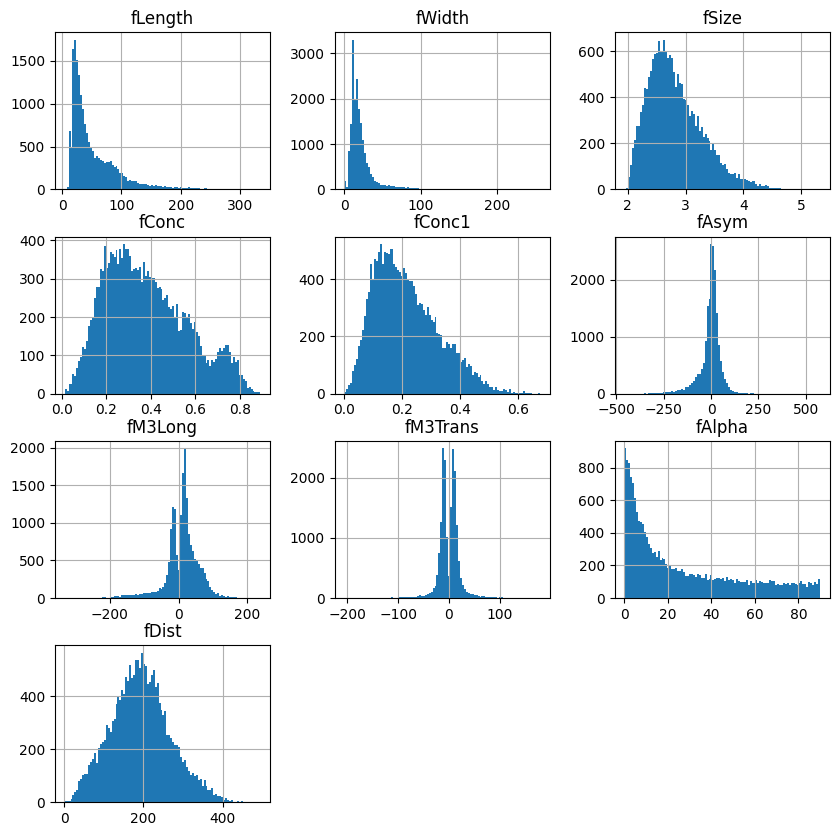

In [ ]:
fig1=DF.hist(figsize=(10, 10), layout=(-1, 3), bins=100);

In [ ]:
DF["class"].value_counts()

,count
class,
g,12332
h,6573


Видно, что количесвто объектов класса g почти в 2 раза больше чем h

Посмотрим на содержание каждого признака для каждого класса

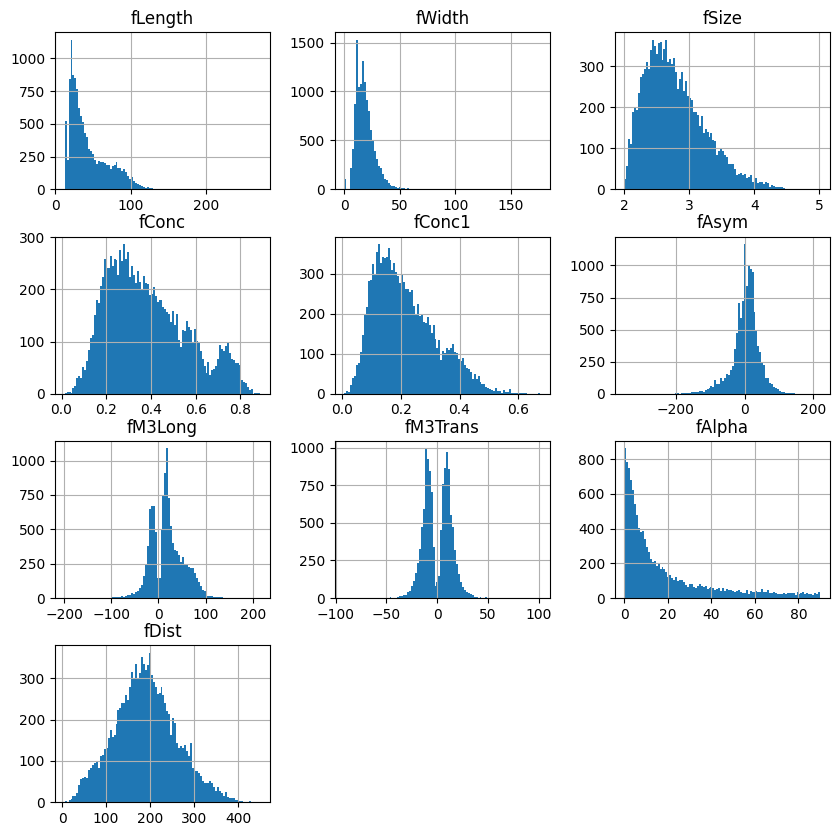

In [ ]:
fig2=DF[DF['class']=='g'].hist(figsize=(10, 10), layout=(-1, 3), bins=100);

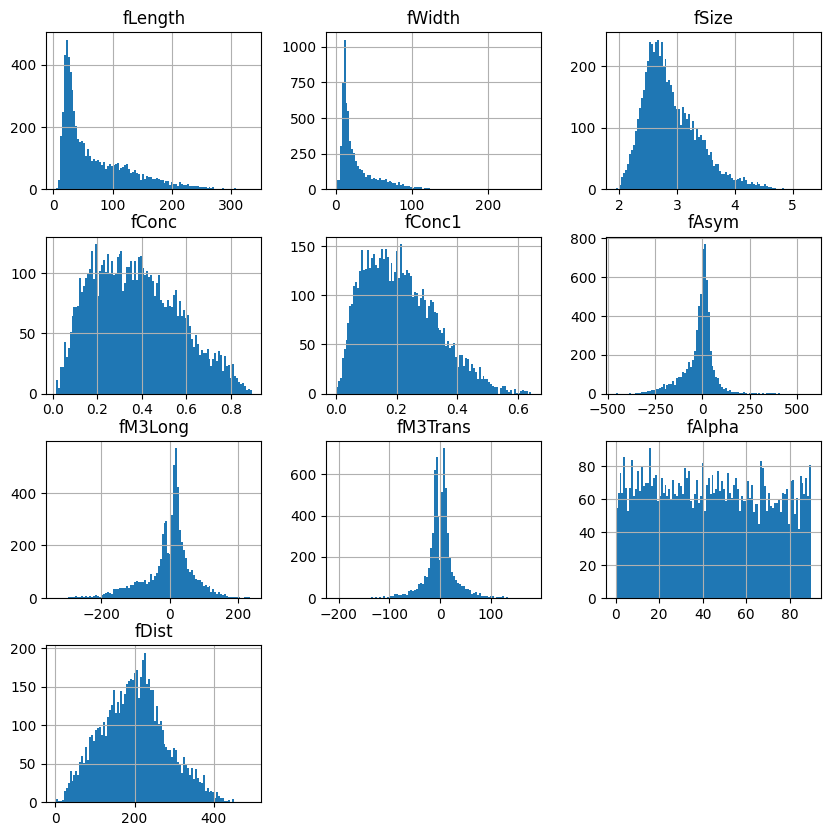

In [ ]:
fig2=DF[DF['class']=='h'].hist(figsize=(10, 10), layout=(-1, 3), bins=100);

Видно, что высокие значения параметра fAlpha отвечают классу g, но данные все равно распределены сильно не симметрично

Также видно, что для класса g в признаках  fLength и fAsum около нуля присутствуют выбросы

## Корреляционный анализ

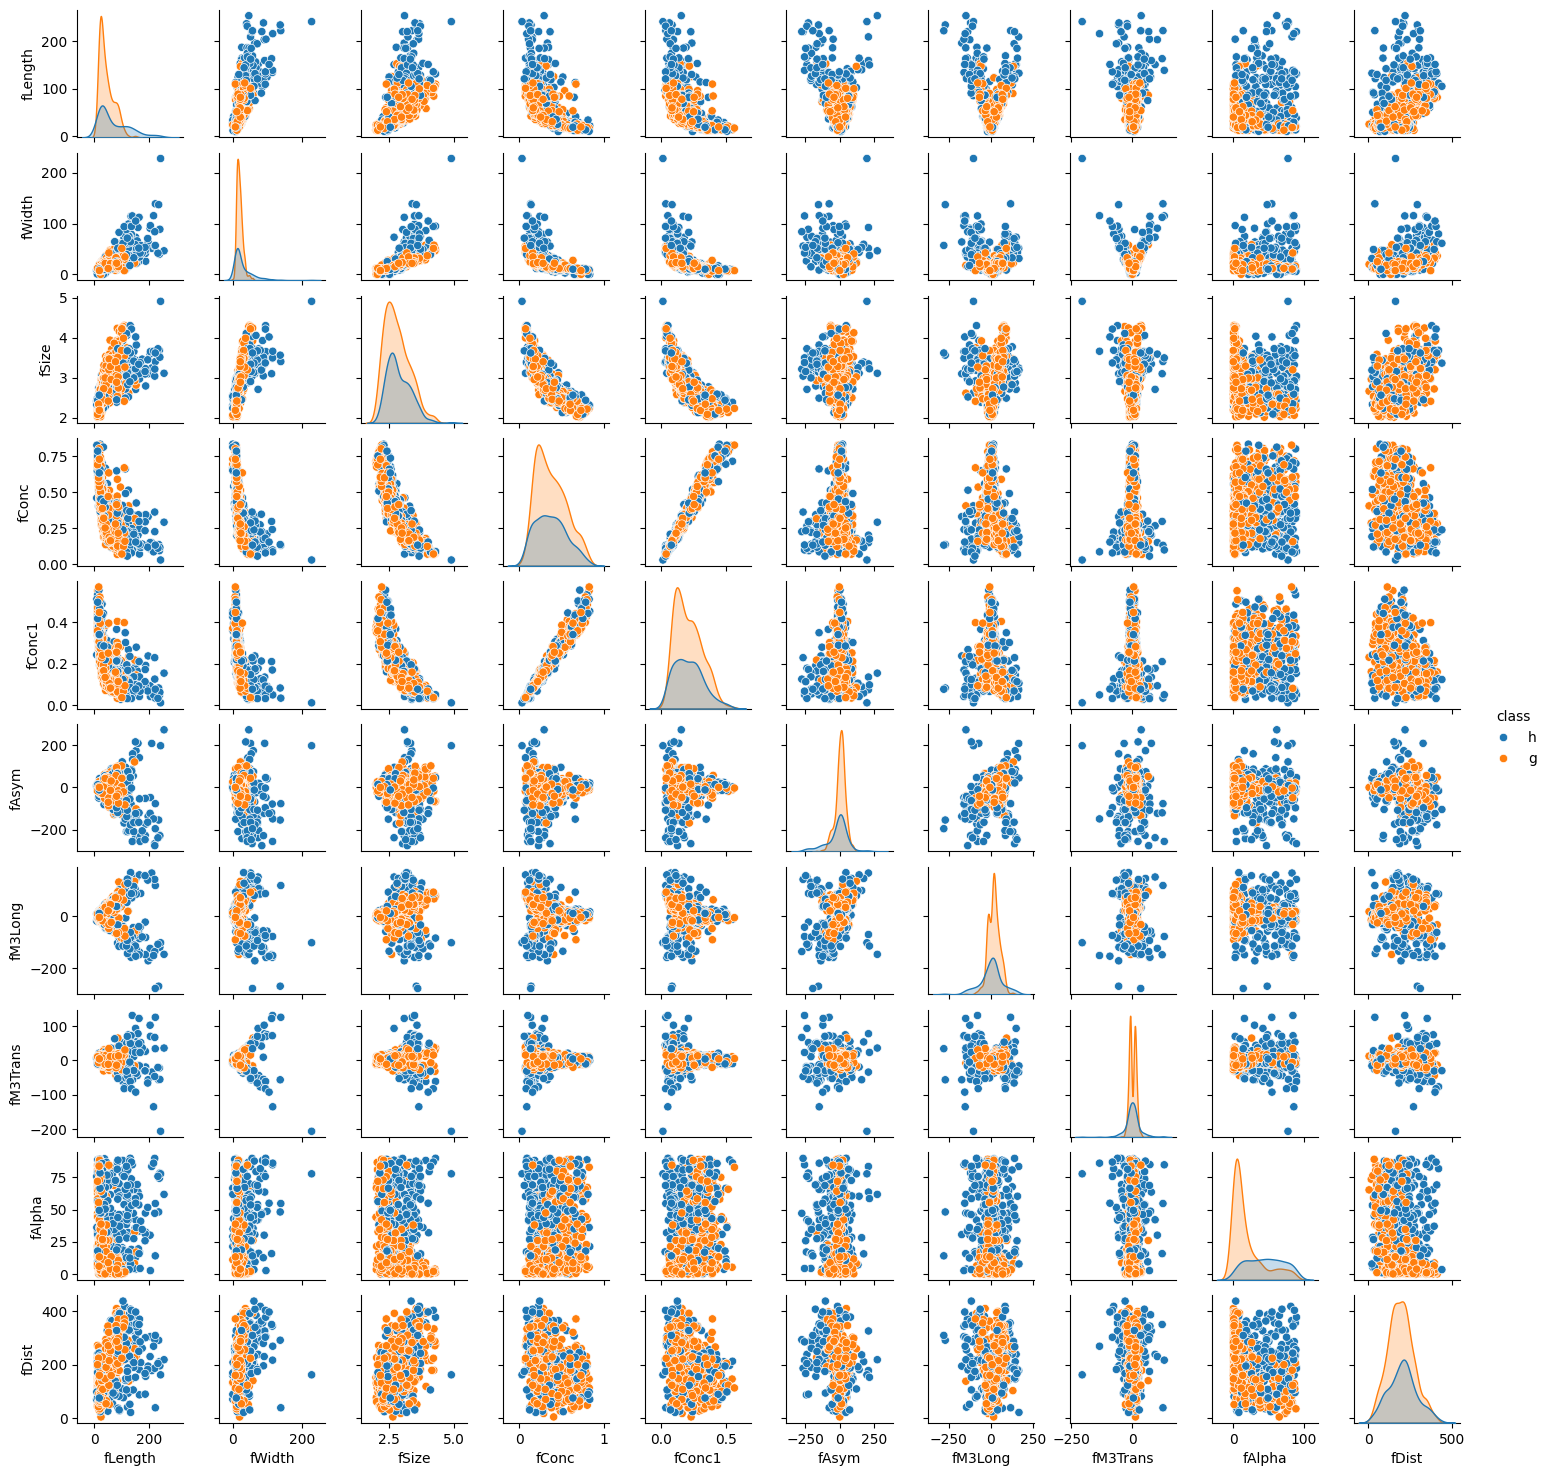

In [ ]:
setdat = DF.sample(n=1000)
sns.pairplot(setdat, hue="class", height=1.5)
plt.show()

Видно, что практически ни в одном из случаев парных признаков невозсможно разделить классы линейно, много данных накладываются друг на друга

Рассмоотрим отдельно графики зависимости fAlpha и fLength, fAlpha и fWidth, fLength и fSize, т. к. они больше всего похожи на линейное разделение

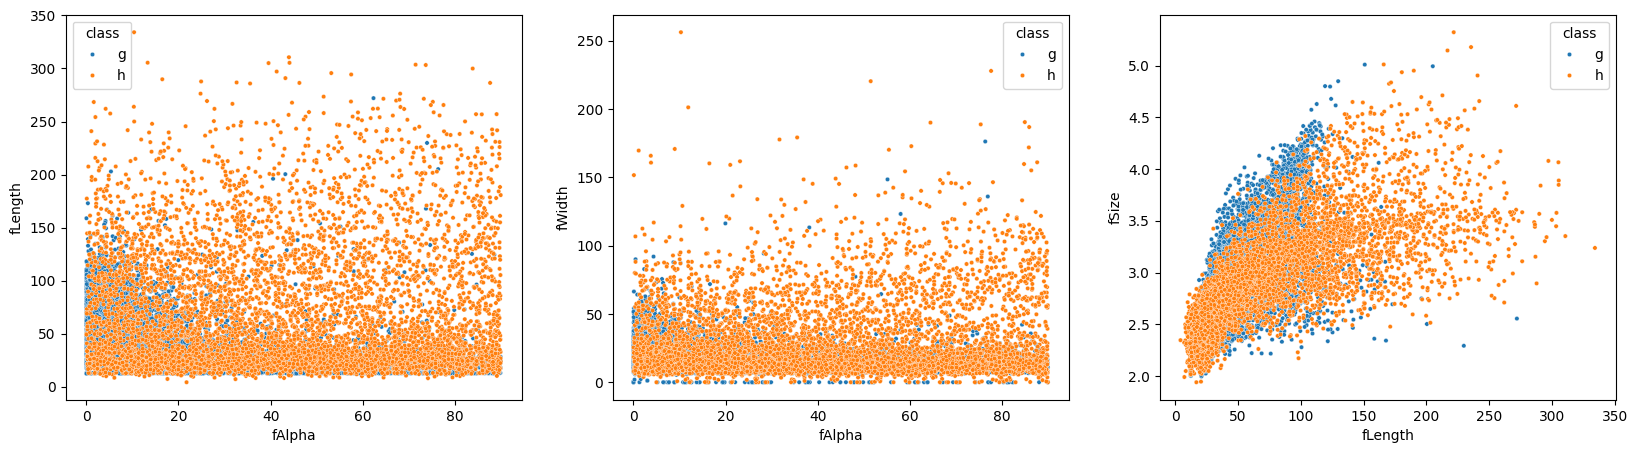

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,5));

sns.scatterplot(DF, x=DF['fAlpha'], y=DF['fLength'], hue='class', s=10, ax=axes[0]);
sns.scatterplot(DF, x=DF['fAlpha'], y=DF['fWidth'], hue='class', s=10, ax=axes[1]);
sns.scatterplot(DF, x=DF['fLength'], y=DF['fSize'], hue='class', s=10, ax=axes[2]);

Все-таки в данном случае линейно разделить классы невозможно

Можно также заметить, что fConc1 и fConc имеют сильную корреляцию

Построим корреляционную матрицу

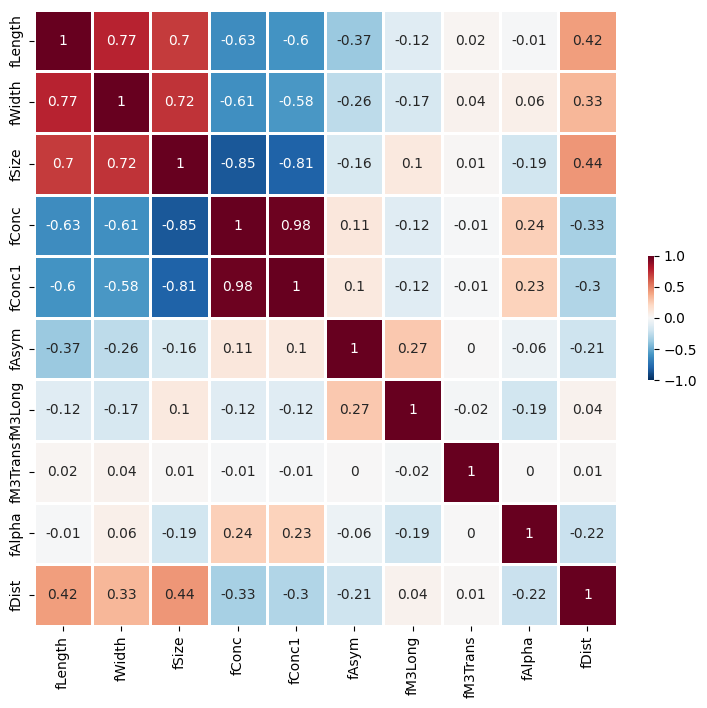

In [ ]:
plt.figure(figsize=(8, 8))        # Задаем размер картинки

heatmap = sns.heatmap(            # Рисуем тепловую карту (матрицу)
    DF.corr(method="pearson", numeric_only=True).round(2), # вычисляем коэффициент корреляции Пирсона и округляем до второго знака
    annot=True,                   # вставим значения коэффициента корреляции в каждую ячейку
    cmap="RdBu_r",                # Задаем палитру раскраски ячеек (необязательно)
    vmax=1,                       # Задаем верхнюю границу дипазона значений для цветовой панели справа
    vmin=-1,                      # Задаем нижнюю границу дипазона значений для цветовой панели справа
    cbar_kws={"fraction": 0.01},  # уменьшаем размер цветовой панели справа (необязтельно)
    linewidth=2,                  # здаем толщину линий между ячейками (необязательно)
)

plt.show()

Действительно, коэффициент корреляции Пирсона для fConc1 и fConc 0.98. Избавимся от fConc1 (уменьшив размерность данных)

Также видно, что длина, ширина и размер имеют коэффициент корреляции примерно 0.7, но каждый их них по своему зависит от других признаков, поэтому оставим их

In [ ]:
DF = DF.drop(columns=['fConc1'])

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18905 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   18905 non-null  float64
 1   fWidth    18905 non-null  float64
 2   fSize     18905 non-null  float64
 3   fConc     18905 non-null  float64
 4   fAsym     18905 non-null  float64
 5   fM3Long   18905 non-null  float64
 6   fM3Trans  18905 non-null  float64
 7   fAlpha    18905 non-null  float64
 8   fDist     18905 non-null  float64
 9   class     18905 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
DF.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Стандартизация

Разделим данные на признаки и метки, стандартизируем значения признаков

In [ ]:
X = DF.drop(columns=["class"])
y = DF["class"].map({"g": 1, "h": 0}) # одновременно цифровизовали значения классов

stand_scaler = StandardScaler()
norm_scaler = MinMaxScaler()
X_stand = stand_scaler.fit_transform(X)   # стандартизация
X_norm = norm_scaler.fit_transform(X)   # нормализация

In [ ]:
X.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,-5.5277,28.5525,21.8393,4.6480,356.4620


In [ ]:
print(X_norm[:5])

[[0.0743064  0.06241507 0.20804258 0.43038982 0.47003175 0.620576
  0.51249308 0.44546667 0.1630664 ]
 [0.08281491 0.04572669 0.17066824 0.58779407 0.46864939 0.62375579
  0.50794422 0.07067667 0.41267917]
 [0.4782407  0.53057937 0.62681845 0.02761677 0.5562148  0.46820125
  0.41654048 0.85511111 0.51692609]
 [0.05921214 0.03733803 0.1174453  0.68371406 0.46955777 0.57062994
  0.5152187  0.1161     0.23358172]
 [0.21477447 0.12060324 0.36067416 0.34515286 0.43787003 0.63205029
  0.5903734  0.05164444 0.71858167]]


In [ ]:
print(X_stand[:5])

[[-0.57656132 -0.33572193 -0.38051817  0.06323257  0.5402318   0.2238177
  -0.40732509  0.48079825 -1.49737758]
 [-0.51013945 -0.56952291 -0.64810836  0.82128723  0.5160285   0.2594331
  -0.49178832 -0.81245485  0.15463134]
 [ 2.57676309  6.22316985  2.61780447 -1.87651165  2.04917716 -1.48286451
  -2.18897616  1.89432036  0.84456736]
 [-0.69439513 -0.68704635 -1.02917033  1.28323535  0.53193299 -0.33560604
  -0.3567155  -0.65571677 -1.03068696]
 [ 0.52000652  0.47948316  0.71228289 -0.34726635 -0.02287523  0.35233607
   1.03875947 -0.87812757  2.17918188]]


In [ ]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


## Разбиваем на тренировочные и тестовые данные

In [ ]:
X_stand_train, X_stand_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.33, random_state=33)
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=33)

## Обучение

Используем несколько методов:
1. Метод опорных вектров (SVC, по умолчанию используется rbf (радиально базисная функция) c параметром регуляризации C = 1)
2. Метод решающих деревьев
3. Метод случайного леса
4. Методы градиентного бустинга, включая XGBoost, LightGBM,
CatBoost

In [ ]:
models = {
    "SVM": SVC(probability=True),
    "DT": DecisionTreeClassifier(),
    "Random_Forest": RandomForestClassifier(),
    "Gradient_Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

Для удобства занесли их в словарь, чтобы поочерёдно обучить каждую

Для удобства определим функцию, которая будет принимать модели для обучения, тренировочные и тестовые данные, обучать и проверять на них несколько моделей последовательно, запоминая результат (2 метрики - accuracy и roc-auc) в словаре results

In [ ]:
def obuch(models, X_train, y_train, X_test, y_test):
  results= {}
  for name, model in models.items():
    print(f"Обучение {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = {
        "accuracy": acc,
        "roc_auc": roc_auc
    }
  return results

функция classification_report выведет подробный отчет о результатах в виде нескольких метрик для каждого из двух классов и их усреднённых значений. В целом о точности модели будем судить по accuracy (функция accuracy_score) и roc_auc (функция roc_auc_score) которые программа запомнит в словаре results

In [ ]:
obuch_stand = obuch(models, X_stand_train, y_train, X_stand_test, y_test)

Обучение SVM...
SVM Accuracy: 0.8658
SVM ROC-AUC: 0.9175
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      2217
           1       0.85      0.95      0.90      4022

    accuracy                           0.87      6239
   macro avg       0.87      0.83      0.85      6239
weighted avg       0.87      0.87      0.86      6239

Обучение DT...
DT Accuracy: 0.8139
DT ROC-AUC: 0.7960
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      2217
           1       0.85      0.86      0.86      4022

    accuracy                           0.81      6239
   macro avg       0.80      0.80      0.80      6239
weighted avg       0.81      0.81      0.81      6239

Обучение Random_Forest...
Random_Forest Accuracy: 0.8769
Random_Forest ROC-AUC: 0.9316
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2217
           1       0.88      0.94      

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.8798
LightGBM ROC-AUC: 0.9375
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2217
           1       0.88      0.94      0.91      4022

    accuracy                           0.88      6239
   macro avg       0.88      0.85      0.86      6239
weighted avg       0.88      0.88      0.88      6239

Обучение CatBoost...
CatBoost Accuracy: 0.8881
CatBoost ROC-AUC: 0.9413
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2217
           1       0.89      0.95      0.92      4022

    accuracy                           0.89      6239
   macro avg       0.89      0.86      0.87      6239
weighted avg       0.89      0.89      0.89      6239



для каждой модели получаем набор метрик

In [ ]:
print(obuch_stand)

{'SVM': {'accuracy': 0.8658438852380189, 'roc_auc': 0.9174888810684222}, 'DT': {'accuracy': 0.8139124859753165, 'roc_auc': 0.7959527178775643}, 'Random_Forest': {'accuracy': 0.8769033498958166, 'roc_auc': 0.931580748822388}, 'Gradient_Boosting': {'accuracy': 0.8696906555537747, 'roc_auc': 0.9252129750064317}, 'XGBoost': {'accuracy': 0.8778650424747556, 'roc_auc': 0.9319494920472358}, 'LightGBM': {'accuracy': 0.8797884276326334, 'roc_auc': 0.9374900608673047}, 'CatBoost': {'accuracy': 0.8881230966501041, 'roc_auc': 0.9413376407207359}}


CatBoost предсказывает точнее остальных

Попробуем вместо стандартизации использовать нормализацию признаков

In [ ]:
obuch_norm = obuch(models, X_norm_train, y_train, X_norm_test, y_test)

Обучение SVM...
SVM Accuracy: 0.8573
SVM ROC-AUC: 0.9098
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      2217
           1       0.84      0.95      0.90      4022

    accuracy                           0.86      6239
   macro avg       0.87      0.82      0.83      6239
weighted avg       0.86      0.86      0.85      6239

Обучение DT...
DT Accuracy: 0.8157
DT ROC-AUC: 0.7980
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2217
           1       0.86      0.86      0.86      4022

    accuracy                           0.82      6239
   macro avg       0.80      0.80      0.80      6239
weighted avg       0.82      0.82      0.82      6239

Обучение Random_Forest...
Random_Forest Accuracy: 0.8751
Random_Forest ROC-AUC: 0.9324
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      2217
           1       0.88      0.94      

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.8795
LightGBM ROC-AUC: 0.9346
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2217
           1       0.88      0.94      0.91      4022

    accuracy                           0.88      6239
   macro avg       0.88      0.85      0.86      6239
weighted avg       0.88      0.88      0.88      6239

Обучение CatBoost...
CatBoost Accuracy: 0.8881
CatBoost ROC-AUC: 0.9413
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2217
           1       0.89      0.95      0.92      4022

    accuracy                           0.89      6239
   macro avg       0.89      0.86      0.87      6239
weighted avg       0.89      0.89      0.89      6239



In [ ]:
print(obuch_stand)
print(obuch_norm)

{'SVM': {'accuracy': 0.8658438852380189, 'roc_auc': 0.9174888810684222}, 'DT': {'accuracy': 0.8139124859753165, 'roc_auc': 0.7959527178775643}, 'Random_Forest': {'accuracy': 0.8769033498958166, 'roc_auc': 0.931580748822388}, 'Gradient_Boosting': {'accuracy': 0.8696906555537747, 'roc_auc': 0.9252129750064317}, 'XGBoost': {'accuracy': 0.8778650424747556, 'roc_auc': 0.9319494920472358}, 'LightGBM': {'accuracy': 0.8797884276326334, 'roc_auc': 0.9374900608673047}, 'CatBoost': {'accuracy': 0.8881230966501041, 'roc_auc': 0.9413376407207359}}
{'SVM': {'accuracy': 0.8573489341240583, 'roc_auc': 0.9098262443345544}, 'DT': {'accuracy': 0.8156755890367046, 'roc_auc': 0.7980286928882575}, 'Random_Forest': {'accuracy': 0.8751402468344286, 'roc_auc': 0.9324391870871687}, 'Gradient_Boosting': {'accuracy': 0.8696906555537747, 'roc_auc': 0.9251833678861884}, 'XGBoost': {'accuracy': 0.8778650424747556, 'roc_auc': 0.9319494920472358}, 'LightGBM': {'accuracy': 0.8794678634396538, 'roc_auc': 0.9345551429250

Видно, что для SVM результат стал чуть хуже, различие во 2 знаке после запятой, для остальных методов результаты практически не отличаются

Попробуем сбалансировать классы (дополним минорный класс синтетическими данными) (для стандартизированных признаков)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_stand_train, X_stand_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.33, random_state=33)

smote = SMOTE(sampling_strategy='auto', random_state=33)
X_res, y_res = smote.fit_resample(X_stand_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
print(f"До SMOTE: {X_stand_train.shape}, {y_train.shape}")
print(f"После SMOTE: {X_res.shape}, {y_res.shape}")

До SMOTE: (12666, 9), (12666,)
После SMOTE: (16620, 9), (16620,)


In [ ]:
obuch_smote = obuch(models, X_res, y_res, X_stand_test, y_test)

Обучение SVM...
SVM Accuracy: 0.8636
SVM ROC-AUC: 0.9191
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2217
           1       0.89      0.90      0.89      4022

    accuracy                           0.86      6239
   macro avg       0.85      0.85      0.85      6239
weighted avg       0.86      0.86      0.86      6239

Обучение DT...
DT Accuracy: 0.7988
DT ROC-AUC: 0.7887
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      2217
           1       0.86      0.82      0.84      4022

    accuracy                           0.80      6239
   macro avg       0.78      0.79      0.78      6239
weighted avg       0.80      0.80      0.80      6239

Обучение Random_Forest...
Random_Forest Accuracy: 0.8755
Random_Forest ROC-AUC: 0.9322
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2217
           1       0.90      0.91      

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.8713
LightGBM ROC-AUC: 0.9353
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2217
           1       0.90      0.90      0.90      4022

    accuracy                           0.87      6239
   macro avg       0.86      0.86      0.86      6239
weighted avg       0.87      0.87      0.87      6239

Обучение CatBoost...
CatBoost Accuracy: 0.8816
CatBoost ROC-AUC: 0.9403
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2217
           1       0.90      0.91      0.91      4022

    accuracy                           0.88      6239
   macro avg       0.87      0.87      0.87      6239
weighted avg       0.88      0.88      0.88      6239



In [ ]:
print(obuch_stand)
print(obuch_norm)
print(obuch_smote)

{'SVM': {'accuracy': 0.8658438852380189, 'roc_auc': 0.9174888810684222}, 'DT': {'accuracy': 0.8139124859753165, 'roc_auc': 0.7959527178775643}, 'Random_Forest': {'accuracy': 0.8769033498958166, 'roc_auc': 0.931580748822388}, 'Gradient_Boosting': {'accuracy': 0.8696906555537747, 'roc_auc': 0.9252129750064317}, 'XGBoost': {'accuracy': 0.8778650424747556, 'roc_auc': 0.9319494920472358}, 'LightGBM': {'accuracy': 0.8797884276326334, 'roc_auc': 0.9374900608673047}, 'CatBoost': {'accuracy': 0.8881230966501041, 'roc_auc': 0.9413376407207359}}
{'SVM': {'accuracy': 0.8573489341240583, 'roc_auc': 0.9098262443345544}, 'DT': {'accuracy': 0.8156755890367046, 'roc_auc': 0.7980286928882575}, 'Random_Forest': {'accuracy': 0.8751402468344286, 'roc_auc': 0.9324391870871687}, 'Gradient_Boosting': {'accuracy': 0.8696906555537747, 'roc_auc': 0.9251833678861884}, 'XGBoost': {'accuracy': 0.8778650424747556, 'roc_auc': 0.9319494920472358}, 'LightGBM': {'accuracy': 0.8794678634396538, 'roc_auc': 0.9345551429250

Разница между метриками разных классов стала меньше, но на основном результате это почти никак не отразилось

In [ ]:
df_stand = pd.DataFrame(obuch_stand).T
df_norm = pd.DataFrame(obuch_norm).T
df_smote = pd.DataFrame(obuch_smote).T

df_all = pd.concat([df_stand, df_norm, df_smote])
df_all.reset_index(inplace=True)
df_all.rename(columns={'index': 'Model'}, inplace=True)

df_all

,Model,accuracy,roc_auc
0,SVM,0.865844,0.917489
1,DT,0.813912,0.795953
2,Random_Forest,0.876903,0.931581
3,Gradient_Boosting,0.869691,0.925213
4,XGBoost,0.877865,0.931949
5,LightGBM,0.879788,0.937490
6,CatBoost,0.888123,0.941338
7,SVM,0.857349,0.909826
8,DT,0.815676,0.798029
9,Random_Forest,0.875140,0.932439


Для всех 3 случаев метод CatBoost показал наивысшую точность

Попробуем изменить параметры моделей

### SVM

Посмотрим метод опорных векторов для нескольких параметров ядра

In [ ]:
models_svm = {
    "SVM_linear": SVC(kernel = 'linear', probability=True),   # линейное ядро, ожидается плохой результат
    "SVM_poly": SVC(kernel = 'poly', probability=True),
    "SVM_poly_c0,1": SVC(C = 0.1, kernel = 'poly', probability=True),   # полиномиальное ядро с параметром регуляризации 0.1 по умолчанию степень полинома degree = 3
    "SVM_poly_c1_d2": SVC(C = 1, kernel = 'poly', degree = 2, probability=True),
    "SVM_poly_c5_d2": SVC(C = 5, kernel = 'poly', degree = 2, probability=True),
    "SVM_poly_c1_d5": SVC(C = 1, kernel = 'poly', degree = 5, probability=True),
    "SVM_poly_c5_d5": SVC(C = 5, kernel = 'poly', degree = 5, probability=True),
}

Обучим эти модели на сбалансированных стандартизированных данных

In [ ]:
obuch_SVM = obuch(models_svm, X_res, y_res, X_stand_test, y_test)

Обучение SVM_linear...
SVM_linear Accuracy: 0.7875
SVM_linear ROC-AUC: 0.8423
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2217
           1       0.84      0.82      0.83      4022

    accuracy                           0.79      6239
   macro avg       0.77      0.77      0.77      6239
weighted avg       0.79      0.79      0.79      6239

Обучение SVM_poly...
SVM_poly Accuracy: 0.8150
SVM_poly ROC-AUC: 0.8716
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      2217
           1       0.82      0.92      0.86      4022

    accuracy                           0.82      6239
   macro avg       0.81      0.77      0.79      6239
weighted avg       0.81      0.82      0.81      6239

Обучение SVM_poly_c0,1...
SVM_poly_c0,1 Accuracy: 0.7812
SVM_poly_c0,1 ROC-AUC: 0.8535
              precision    recall  f1-score   support

           0       0.78      0.53      0.63      2217


Модели с малой регуляризацией более устойчивы к шуму, но допускают больше ошибок, точность ниже.

In [ ]:
print(pd.DataFrame(obuch_SVM).T)

                accuracy   roc_auc
SVM_linear      0.787466  0.842306
SVM_poly        0.815034  0.871568
SVM_poly_c0,1   0.781215  0.853518
SVM_poly_c1_d2  0.820965  0.877397
SVM_poly_c5_d2  0.825453  0.883770
SVM_poly_c1_d5  0.791152  0.865687
SVM_poly_c5_d5  0.811669  0.873112


Полиномиальная модель с регуляризацией 0.1 предсказывает хуже линейной. Самый точный результат выдала полиномиальная модель со степенью 2, и регуляризацией 5, но она всё еще хуже чем rbf

Попробуем изменить параметр регуляризации для SVM с rbf, чем больше параметр, тем точнее модель, но если он слишком большой модель переобучается

In [ ]:
models_svm_rbf = {
    "SVM_rbf_c0.1": SVC(C = 0.1, kernel = 'rbf', probability=True),
    "SVM_rbf_c3": SVC(C = 3, kernel = 'rbf', probability=True),
    "SVM_rbf_c5": SVC(C = 5, kernel = 'rbf', probability=True),
    "SVM_rbf_c10": SVC(C = 10, kernel = 'rbf', probability=True),
    "SVM_rbf_c100": SVC(C = 100, kernel = 'rbf', probability=True),
}

In [ ]:
obuch_SVM_rbf = obuch(models_svm_rbf, X_res, y_res, X_stand_test, y_test)

Обучение SVM_rbf_c0.1...
SVM_rbf_c0.1 Accuracy: 0.8540
SVM_rbf_c0.1 ROC-AUC: 0.9105
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2217
           1       0.88      0.89      0.89      4022

    accuracy                           0.85      6239
   macro avg       0.84      0.84      0.84      6239
weighted avg       0.85      0.85      0.85      6239

Обучение SVM_rbf_c3...
SVM_rbf_c3 Accuracy: 0.8676
SVM_rbf_c3 ROC-AUC: 0.9221
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2217
           1       0.89      0.90      0.90      4022

    accuracy                           0.87      6239
   macro avg       0.86      0.85      0.85      6239
weighted avg       0.87      0.87      0.87      6239

Обучение SVM_rbf_c5...
SVM_rbf_c5 Accuracy: 0.8702
SVM_rbf_c5 ROC-AUC: 0.9234
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      22

In [ ]:
print(pd.DataFrame(obuch_SVM_rbf).T)

              accuracy   roc_auc
SVM_rbf_c0.1  0.853983  0.910498
SVM_rbf_c3    0.867607  0.922093
SVM_rbf_c5    0.870172  0.923449
SVM_rbf_c10   0.874179  0.925120
SVM_rbf_c100  0.872576  0.925201


Как видно, с увеличением регуляризации увеличивается точность, но для C = 100, точность ниже C = 10 только в 3 знаке после запятой. Лучше всего предсказала модель с C = 10.

In [ ]:
df_svm = pd.concat([pd.DataFrame(obuch_SVM_rbf).T, pd.DataFrame(obuch_SVM).T])
df_svm.reset_index(inplace=True)
df_svm.rename(columns={'index': 'Model'}, inplace=True)

df_svm

,Model,accuracy,roc_auc
0,SVM_rbf_c0.1,0.853983,0.910498
1,SVM_rbf_c3,0.867607,0.922093
2,SVM_rbf_c5,0.870172,0.923449
3,SVM_rbf_c10,0.874179,0.925120
4,SVM_rbf_c100,0.872576,0.925201
5,SVM_linear,0.787466,0.842306
6,SVM_poly,0.815034,0.871568
7,"SVM_poly_c0,1",0.781215,0.853518
8,SVM_poly_c1_d2,0.820965,0.877397
9,SVM_poly_c5_d2,0.825453,0.883770


Точнее всех представленных оказалась SVM с радиально базисной функцией и параметром регуляризации 10 - SVM_rbf_c10

### DT

In [ ]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      stra

Попробуем менять значения глубины дерева, минимального количества выборок для внутреннего узла и конечного.

In [ ]:
models_dt = {
    "DT_3_2_1": DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1),
    "DT_3_5_1": DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=1),
    "DT_3_10_1": DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=1),
    "DT_3_10_5": DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5),
    "DT_5_2_1": DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1),
    "DT_5_5_1": DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1),
    "DT_5_10_5": DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=5),
    "DT_10_2_1": DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1),
    "DT_10_10_1": DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=1),
    "DT_10_10_5": DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    "DT_none_2_1": DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1),
    "DT_none_5_5": DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=5),
    "DT_none_10_5": DecisionTreeClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=5),
}

In [ ]:
obuch_DT = obuch(models_dt, X_res, y_res, X_stand_test, y_test)

Обучение DT_3_2_1...
DT_3_2_1 Accuracy: 0.7751
DT_3_2_1 ROC-AUC: 0.8368
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      2217
           1       0.86      0.78      0.82      4022

    accuracy                           0.78      6239
   macro avg       0.76      0.77      0.76      6239
weighted avg       0.79      0.78      0.78      6239

Обучение DT_3_5_1...
DT_3_5_1 Accuracy: 0.7751
DT_3_5_1 ROC-AUC: 0.8368
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      2217
           1       0.86      0.78      0.82      4022

    accuracy                           0.78      6239
   macro avg       0.76      0.77      0.76      6239
weighted avg       0.79      0.78      0.78      6239

Обучение DT_3_10_1...
DT_3_10_1 Accuracy: 0.7751
DT_3_10_1 ROC-AUC: 0.8368
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      2217
           1      

все модели обучились за 2 секунды - преимущество деревьев решений

In [ ]:
df_DT = pd.DataFrame(obuch_DT).T
df_DT.reset_index(inplace=True)
df_DT.rename(columns={'index': 'Model'}, inplace=True)

df_DT

,Model,accuracy,roc_auc
0,DT_3_2_1,0.775124,0.836795
1,DT_3_5_1,0.775124,0.836795
2,DT_3_10_1,0.775124,0.836795
3,DT_3_10_5,0.775124,0.836795
4,DT_5_2_1,0.817118,0.869355
5,DT_5_5_1,0.817118,0.869355
6,DT_5_10_5,0.816798,0.869143
7,DT_10_2_1,0.839878,0.859656
8,DT_10_10_1,0.841802,0.870909
9,DT_10_10_5,0.841321,0.876198


Можно заметить что в основном увеличение точности происходит за счет увеличения глубины дерева

Максимальная точностью соответствует модели с глубиной 10, min выборок 10 и min образцов в листе 1 (DT_10_10_1).C увеличением глубины и/или уменьшением выборки точность растет. Но как можно заметить точность модели для min выборок 2 меньше, и для неограниченной глубины с параметрами выборки узла 2 точность ниже, это может говорить о переобучении.

### RF

In [ ]:
help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
 |  The sub-sample size is controlled with the `max_samples` parame

Посмотрим как точность зависит от количества деревьев в ансамбле (по умолчанию 100)

In [ ]:
models_RF = {
    "RF_20": RandomForestClassifier(n_estimators=20),
    "RF_100": RandomForestClassifier(n_estimators=100),
    "RF_500": RandomForestClassifier(n_estimators=500),
    "RF_1000": RandomForestClassifier(n_estimators=1000)
}

In [ ]:
obuch_RF = obuch(models_RF, X_res, y_res, X_stand_test, y_test)

Обучение RF_20...
RF_20 Accuracy: 0.8647
RF_20 ROC-AUC: 0.9260
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2217
           1       0.90      0.89      0.89      4022

    accuracy                           0.86      6239
   macro avg       0.85      0.86      0.85      6239
weighted avg       0.87      0.86      0.87      6239

Обучение RF_100...
RF_100 Accuracy: 0.8745
RF_100 ROC-AUC: 0.9332
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2217
           1       0.90      0.91      0.90      4022

    accuracy                           0.87      6239
   macro avg       0.86      0.86      0.86      6239
weighted avg       0.87      0.87      0.87      6239

Обучение RF_500...
RF_500 Accuracy: 0.8740
RF_500 ROC-AUC: 0.9342
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2217
           1       0.90      0.91      0.9

Как можно заметить с увеличением количества деревьев точность увеличивается, но с какого-то момента этот прирост практически незаметен, а время обучения слишком большое

In [ ]:
df_RF = pd.DataFrame(obuch_RF).T
df_RF.reset_index(inplace=True)
df_RF.rename(columns={'index': 'Model'}, inplace=True)

df_RF

,Model,accuracy,roc_auc
0,RF_20,0.864722,0.925996
1,RF_100,0.874499,0.933164
2,RF_500,0.874018,0.934167
3,RF_1000,0.876262,0.934264


максимальную точность показала модель с n_estimators=1000

### Градиентный бустинг

In [ ]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

Попробуем посмотреть как функция потерь влияет на точность

In [ ]:
models_GB_loss = {
    "GB_log": GradientBoostingClassifier(loss='log_loss'),
    "GB_exp": GradientBoostingClassifier(loss='exponential')
}

In [ ]:
obuch_GB_loss = obuch(models_GB_loss, X_res, y_res, X_stand_test, y_test)

Обучение GB_log...
GB_log Accuracy: 0.8631
GB_log ROC-AUC: 0.9244
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2217
           1       0.90      0.89      0.89      4022

    accuracy                           0.86      6239
   macro avg       0.85      0.85      0.85      6239
weighted avg       0.86      0.86      0.86      6239

Обучение GB_exp...
GB_exp Accuracy: 0.8609
GB_exp ROC-AUC: 0.9233
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2217
           1       0.90      0.89      0.89      4022

    accuracy                           0.86      6239
   macro avg       0.85      0.85      0.85      6239
weighted avg       0.86      0.86      0.86      6239



Логарифмическая чуть более точная, она стоит по умолчанию

Попробуем изменять количество итераций, скорость обучения (learning rate) и максимальную глубину

In [ ]:
models_GB = {
    "GB_10_0.1_3": GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3),
    "GB_10_0.1_6": GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=6),
    "GB_10_1_6": GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_depth=6),
    "GB_100_0.1_3": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "GB_100_0.1_6": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6),
    "GB_100_1_6": GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=6),
    "GB_1000_0.1_6": GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=6)
}

In [ ]:
obuch_GB = obuch(models_GB, X_res, y_res, X_stand_test, y_test)

Обучение GB_10_0.1_3...
GB_10_0.1_3 Accuracy: 0.8062
GB_10_0.1_3 ROC-AUC: 0.8783
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      2217
           1       0.86      0.83      0.85      4022

    accuracy                           0.81      6239
   macro avg       0.79      0.80      0.79      6239
weighted avg       0.81      0.81      0.81      6239

Обучение GB_10_0.1_6...
GB_10_0.1_6 Accuracy: 0.8530
GB_10_0.1_6 ROC-AUC: 0.9115
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2217
           1       0.88      0.89      0.89      4022

    accuracy                           0.85      6239
   macro avg       0.84      0.84      0.84      6239
weighted avg       0.85      0.85      0.85      6239

Обучение GB_10_1_6...
GB_10_1_6 Accuracy: 0.8541
GB_10_1_6 ROC-AUC: 0.9142
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2217


In [ ]:
df_GB = pd.concat([pd.DataFrame(obuch_GB).T, pd.DataFrame(obuch_GB_loss).T])
df_GB.reset_index(inplace=True)
df_GB.rename(columns={'index': 'Model'}, inplace=True)

df_GB

,Model,accuracy,roc_auc
0,GB_10_0.1_3,0.806219,0.878313
1,GB_10_0.1_6,0.853021,0.911532
2,GB_10_1_6,0.854143,0.914164
3,GB_100_0.1_3,0.863279,0.924435
4,GB_100_0.1_6,0.875140,0.934357
5,GB_100_1_6,0.846770,0.904898
6,GB_1000_0.1_6,0.874339,0.934085
7,GB_log,0.863119,0.924429
8,GB_exp,0.860875,0.923344


Максимальную точность показала модель с количеством итераций 1000, шагом 0.1 и глубиной 6

## Сравнение

Возьмем лучшие модели из каждого метода и сравним с моделями со значениями по умолчанию

In [ ]:
print(df_svm.columns)

Index(['Model', 'accuracy', 'roc_auc'], dtype='object')


In [ ]:
element1 = df_svm.loc[3]
element2 = df_DT.loc[8]
element3 = df_RF.loc[3]
element4 = df_GB.loc[6]

df_best = pd.DataFrame({
    'SVM': element1,
    'DT': element2,
    'Random_Forest': element3,
    'Gradient_Boosting': element4
}
)

df_best.T

,Model,accuracy,roc_auc
SVM,SVM_rbf_c10,0.874179,0.92512
DT,DT_10_10_1,0.841802,0.870909
Random_Forest,RF_1000,0.876262,0.934264
Gradient_Boosting,GB_1000_0.1_6,0.874339,0.934085


In [ ]:
df_smote = pd.DataFrame(obuch_smote).T

df_smote  # со значениями по умолчанию

,accuracy,roc_auc
SVM,0.863600,0.919109
DT,0.798846,0.788720
Random_Forest,0.875461,0.932199
Gradient_Boosting,0.863119,0.924430
XGBoost,0.870492,0.931451
LightGBM,0.871293,0.935316
CatBoost,0.881552,0.940279


Подбором параметров удалось несколько улучшить точность моделей, всех кроме случайного леса.